In [2]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
df = pd.DataFrame(iris.data, columns = iris.feature_names) 
#every columnName takes value from iris.feature_names and data in it comes from iris.data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
df['target'] = iris.target # target value is 0,1,2 which means that 3 flowers
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
df[df.target==2].head() # it means from 100-element onwards(150) is 'virginica' flower 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [12]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x]) 
# creating new column called 'flower_name' in correlation with target value. 
#For x value of target modefy with iris.target_names[x]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [14]:
from matplotlib import pyplot as plt 
%matplotlib inline

In [15]:
df0 = df[df.target==0] #creating a dataFrame for every flower
df1 = df[df.target==1]
df2 = df[df.target==2]

In [17]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


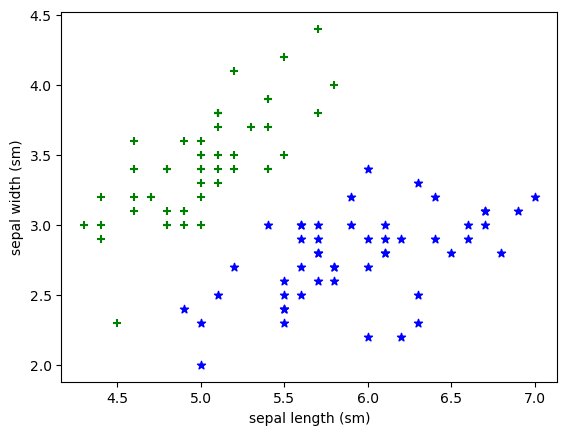

In [22]:
plt.xlabel('sepal length (sm)') # - naming xCoordinate
plt.ylabel('sepal width (sm)') # - naming xCoordinate
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker="+") 
# drawing a scatter plot for 'setosa' flower 
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker="*") 
# for 'versicolor' flower

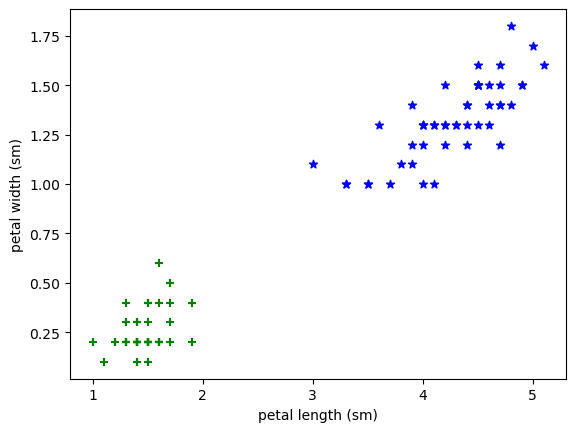

In [23]:
plt.xlabel('petal length (sm)') # - naming xCoordinate
plt.ylabel('petal width (sm)') # - naming xCoordinate
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker="+") 
# drawing a scatter plot for 'setosa' flower 
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', marker="*") 
# for 'versicolor' flower

In [24]:
x = df.drop(['target','flower_name'], axis = 'columns')
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
y = df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [29]:
len(x_train)

120

In [32]:
from sklearn.svm import SVC
model = SVC(C=1.0) # to create Support Vector Machine (SVM) classifier 

In [33]:
model.fit(x_train, y_train)

SVC()

In [34]:
model.score(x_test, y_test)

0.9